In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from cvxopt.solvers import options
from Quantum_Kernel import *
import warnings
warnings.filterwarnings("ignore")
options['show_progress'] = False

In [2]:
sto_index_sets = []
sto_index_test_sets =[]
datasets_X_S =[]
datasets_y =[]
gram_gaussian_set =[]
gram_gaussian_test_set = []
gram_zz_kernel_set = []
gram_zz_kernel_test_set = [] 
gram_kernel_set = []
gram_kernel_test_set = []

for i in range(5):
    sto_index_sets += [pd.read_csv("svm_data/sto_index_sets"+str(i)+".csv").iloc[:,1].tolist()]
    sto_index_test_sets += [pd.read_csv("svm_data/sto_index_test_sets"+str(i)+".csv").iloc[:,1].tolist()]
    datasets_X_S += [pd.read_csv("svm_data/datasets_X_S"+str(i)+".csv").iloc[:,1:].values.tolist()]
    datasets_y += [pd.read_csv("svm_data/datasets_y"+str(i)+".csv").iloc[:,1].values.tolist()]
    
    gram_gaussian_set += [pd.read_csv("svm_data/gram_gaussian_"+str(i)+".csv").iloc[:,1:].values.tolist()]
    gram_gaussian_test_set += [pd.read_csv("svm_data/gram_gaussian_test"+str(i)+".csv").iloc[:,1:].values.tolist()]
    gram_zz_kernel_set += [pd.read_csv("svm_data/gram_zz_kernel"+str(i)+".csv").iloc[:,1:].values.tolist()]
    gram_zz_kernel_test_set += [pd.read_csv("svm_data/gram_zz_kernel_test"+str(i)+".csv").iloc[:,1:].values.tolist()]
    gram_kernel_set += [pd.read_csv("svm_data/gram_kernel"+str(i)+".csv").iloc[:,1:].values.tolist()]
    gram_kernel_test_set += [pd.read_csv("svm_data/gram_kernel_test"+str(i)+".csv").iloc[:,1:].values.tolist()]

In [47]:
plot_data = pd.DataFrame(datasets_X_S[i])
plot_data["ylabel"] = datasets_y[i]

In [50]:
pd.DataFrame(kpca_data)

,0,1
0,0.737400,0.189420
1,0.731961,0.212264
2,0.510183,0.040252
3,0.487053,0.007063
4,0.740525,0.110398
5,0.754302,0.175515
6,0.543991,0.176415
7,0.722604,0.076933
8,0.737400,0.189420
9,0.531567,0.065360


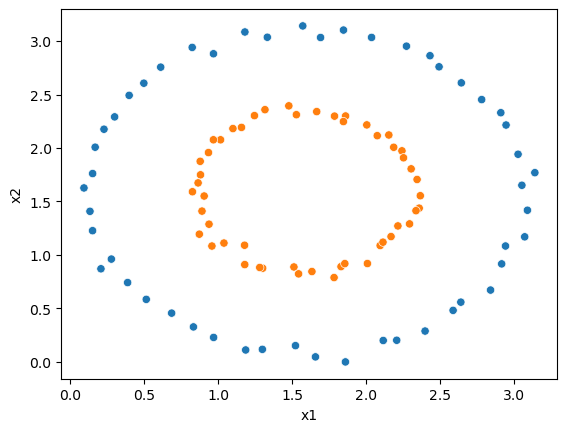

In [54]:
g1 = sns.scatterplot(x="x1",y="x2",hue = "ylabel",data = plot_data,legend=False)

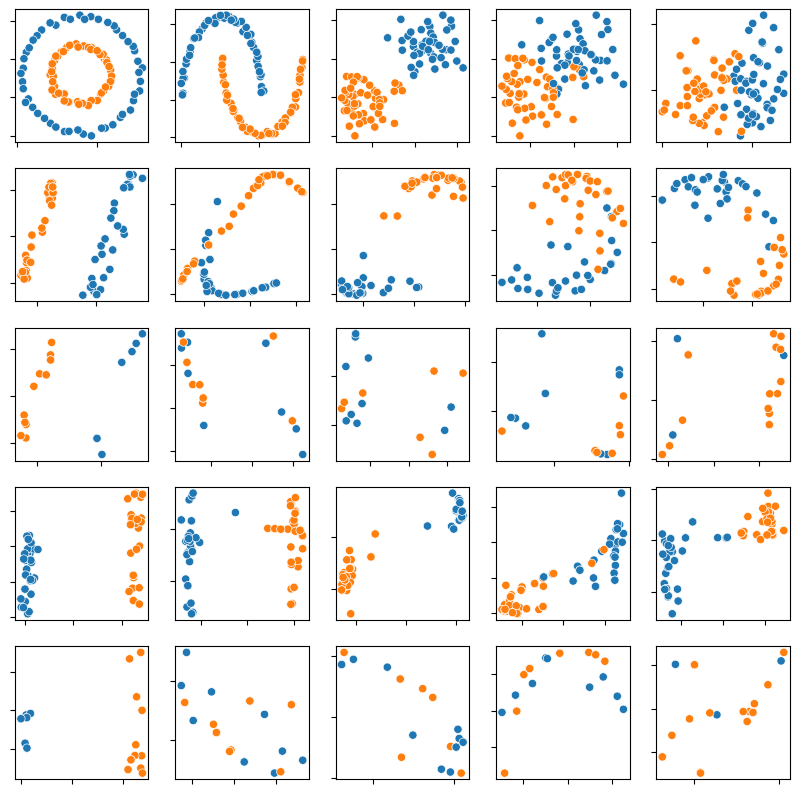

In [63]:
kernel_set = gram_gaussian_set
kernel_test_set = gram_gaussian_test_set
kpca = KPCA()
gsir = GSIR(0.05)

fig,ax = plt.subplots(5,5,figsize = (10,10))
    
for i in range(5):
    sto_ind = sto_index_sets[i]
    data_sto_y =pd.DataFrame(datasets_y[i]).iloc[sto_ind,:].values.reshape(-1)
    sto_ind = sto_index_test_sets[i]
    data_sto_test_y =pd.DataFrame(datasets_y[i]).iloc[sto_ind,:].values.reshape(-1)
    
    plot_data = pd.DataFrame(datasets_X_S[i])
    plot_data.columns = ["x1","x2"]
    plot_data["ylabel"] = datasets_y[i]
    g1 = sns.scatterplot(x="x1",y="x2",hue = "ylabel",data = plot_data,legend=False,ax=ax[0,i])
    g1.set(xlabel = None,ylabel=None,xticklabels=[],yticklabels=[])

    kernel_matrix = kernel_set[i]
    kpca.fit(kernel_matrix)
    plot_data = pd.DataFrame(kpca.transform(kernel_matrix)[:,:2])
    plot_data.columns = ["x1","x2"]
    plot_data["ylabel"] = data_sto_y
    g2 = sns.scatterplot(x="x1",y="x2",hue = "ylabel",data = plot_data,legend=False,ax=ax[1,i])
    g2.set(xlabel = None,ylabel=None,xticklabels=[],yticklabels=[])

    gsir.fit(kernel_matrix,data_sto_y)
    plot_data.iloc[:,:2] = pd.DataFrame(gsir.transform(kernel_matrix)[:,:2])
    plot_data["ylabel"] = data_sto_y
    g3 = sns.scatterplot(x="x1",y="x2",hue = "ylabel",data = plot_data,legend=False,ax = ax[3,i])
    g3.set(xlabel = None,ylabel=None,xticklabels=[],yticklabels=[])

    kernel_test_matrix = kernel_test_set
    plot_data = pd.DataFrame(kpca.transform(kernel_test_matrix[0])[:,:2])
    plot_data.columns = ["x1","x2"]
    plot_data["ylabel"] = data_sto_test_y
    g4 = sns.scatterplot(x="x1",y="x2",hue = "ylabel",data = plot_data,legend=False,ax=ax[2,i])
    g4.set(xlabel = None,ylabel=None,xticklabels=[],yticklabels=[])

    plot_data.iloc[:,:2] = pd.DataFrame(gsir.transform(kernel_test_matrix[0])[:,:2])
    plot_data["ylabel"] = data_sto_test_y
    g5 = sns.scatterplot(x="x1",y="x2",hue = "ylabel",data = plot_data,legend=False,ax = ax[4,i])
    g5.set(xlabel = None,ylabel=None,xticklabels=[],yticklabels=[])
plt.show()

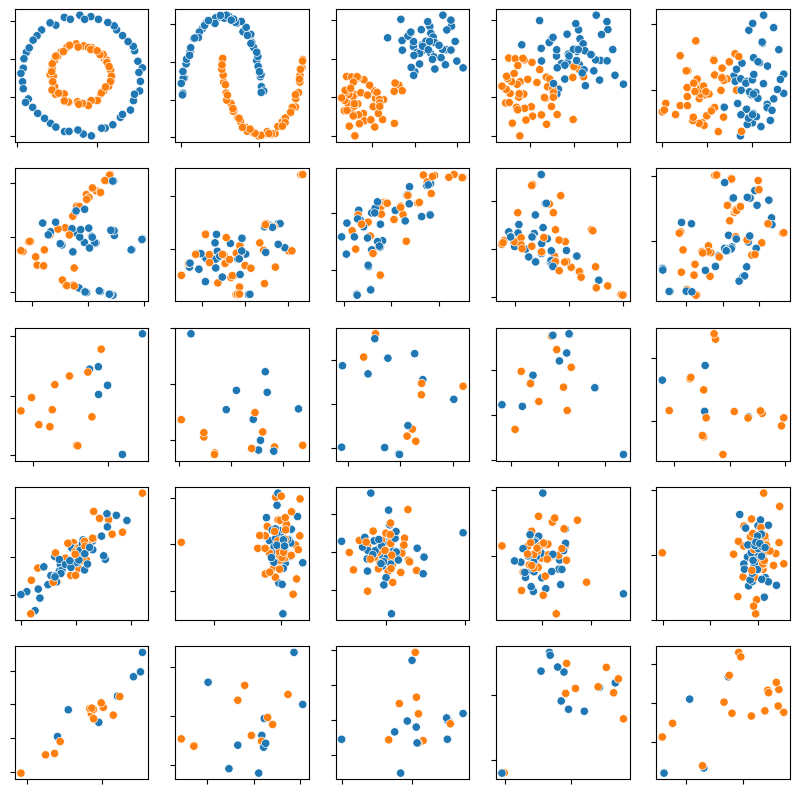

In [64]:
kernel_set = gram_zz_kernel_set
kernel_test_set = gram_zz_kernel_test_set
kpca = KPCA()
gsir = GSIR(0.05)

fig,ax = plt.subplots(5,5,figsize = (10,10))
    
for i in range(5):
    sto_ind = sto_index_sets[i]
    data_sto_y =pd.DataFrame(datasets_y[i]).iloc[sto_ind,:].values.reshape(-1)
    sto_ind = sto_index_test_sets[i]
    data_sto_test_y =pd.DataFrame(datasets_y[i]).iloc[sto_ind,:].values.reshape(-1)
    
    plot_data = pd.DataFrame(datasets_X_S[i])
    plot_data.columns = ["x1","x2"]
    plot_data["ylabel"] = datasets_y[i]
    g1 = sns.scatterplot(x="x1",y="x2",hue = "ylabel",data = plot_data,legend=False,ax=ax[0,i])
    g1.set(xlabel = None,ylabel=None,xticklabels=[],yticklabels=[])

    kernel_matrix = kernel_set[i]
    kpca.fit(kernel_matrix)
    plot_data = pd.DataFrame(kpca.transform(kernel_matrix)[:,:2])
    plot_data.columns = ["x1","x2"]
    plot_data["ylabel"] = data_sto_y
    g2 = sns.scatterplot(x="x1",y="x2",hue = "ylabel",data = plot_data,legend=False,ax=ax[1,i])
    g2.set(xlabel = None,ylabel=None,xticklabels=[],yticklabels=[])

    gsir.fit(kernel_matrix,data_sto_y)
    plot_data.iloc[:,:2] = pd.DataFrame(gsir.transform(kernel_matrix)[:,:2])
    plot_data["ylabel"] = data_sto_y
    g3 = sns.scatterplot(x="x1",y="x2",hue = "ylabel",data = plot_data,legend=False,ax = ax[3,i])
    g3.set(xlabel = None,ylabel=None,xticklabels=[],yticklabels=[])

    kernel_test_matrix = kernel_test_set
    plot_data = pd.DataFrame(kpca.transform(kernel_test_matrix[0])[:,:2])
    plot_data.columns = ["x1","x2"]
    plot_data["ylabel"] = data_sto_test_y
    g4 = sns.scatterplot(x="x1",y="x2",hue = "ylabel",data = plot_data,legend=False,ax=ax[2,i])
    g4.set(xlabel = None,ylabel=None,xticklabels=[],yticklabels=[])

    plot_data.iloc[:,:2] = pd.DataFrame(gsir.transform(kernel_test_matrix[0])[:,:2])
    plot_data["ylabel"] = data_sto_test_y
    g5 = sns.scatterplot(x="x1",y="x2",hue = "ylabel",data = plot_data,legend=False,ax = ax[4,i])
    g5.set(xlabel = None,ylabel=None,xticklabels=[],yticklabels=[])
plt.show()

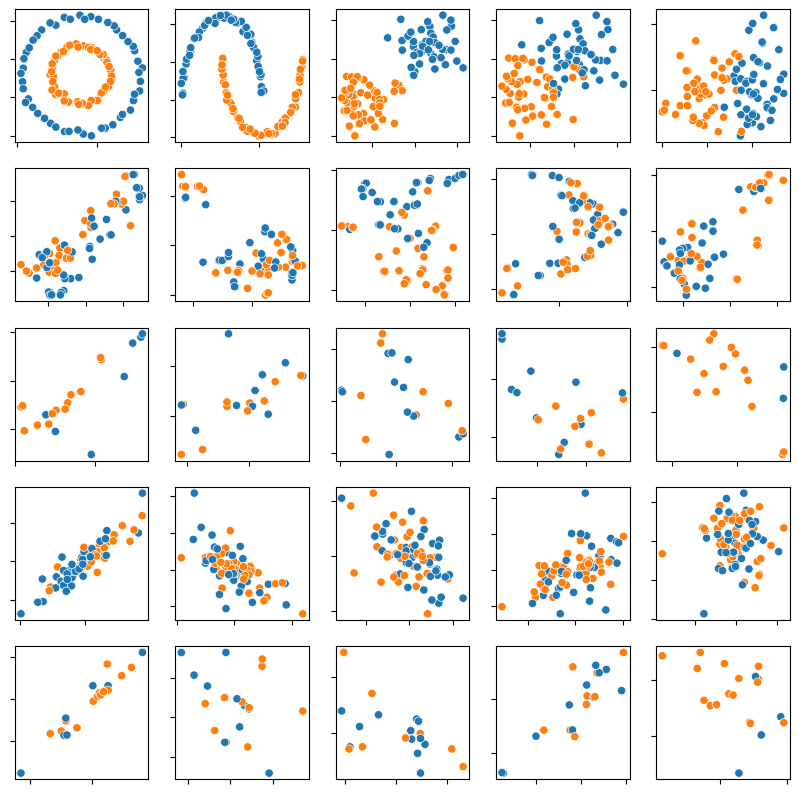

In [65]:
kernel_set = gram_kernel_set
kernel_test_set = gram_kernel_test_set
kpca = KPCA()
gsir = GSIR(0.05)

fig,ax = plt.subplots(5,5,figsize = (10,10))
    
for i in range(5):
    sto_ind = sto_index_sets[i]
    data_sto_y =pd.DataFrame(datasets_y[i]).iloc[sto_ind,:].values.reshape(-1)
    sto_ind = sto_index_test_sets[i]
    data_sto_test_y =pd.DataFrame(datasets_y[i]).iloc[sto_ind,:].values.reshape(-1)
    
    plot_data = pd.DataFrame(datasets_X_S[i])
    plot_data.columns = ["x1","x2"]
    plot_data["ylabel"] = datasets_y[i]
    g1 = sns.scatterplot(x="x1",y="x2",hue = "ylabel",data = plot_data,legend=False,ax=ax[0,i])
    g1.set(xlabel = None,ylabel=None,xticklabels=[],yticklabels=[])

    kernel_matrix = kernel_set[i]
    kpca.fit(kernel_matrix)
    plot_data = pd.DataFrame(kpca.transform(kernel_matrix)[:,:2])
    plot_data.columns = ["x1","x2"]
    plot_data["ylabel"] = data_sto_y
    g2 = sns.scatterplot(x="x1",y="x2",hue = "ylabel",data = plot_data,legend=False,ax=ax[1,i])
    g2.set(xlabel = None,ylabel=None,xticklabels=[],yticklabels=[])

    gsir.fit(kernel_matrix,data_sto_y)
    plot_data.iloc[:,:2] = pd.DataFrame(gsir.transform(kernel_matrix)[:,:2])
    plot_data["ylabel"] = data_sto_y
    g3 = sns.scatterplot(x="x1",y="x2",hue = "ylabel",data = plot_data,legend=False,ax = ax[3,i])
    g3.set(xlabel = None,ylabel=None,xticklabels=[],yticklabels=[])

    kernel_test_matrix = kernel_test_set
    plot_data = pd.DataFrame(kpca.transform(kernel_test_matrix[0])[:,:2])
    plot_data.columns = ["x1","x2"]
    plot_data["ylabel"] = data_sto_test_y
    g4 = sns.scatterplot(x="x1",y="x2",hue = "ylabel",data = plot_data,legend=False,ax=ax[2,i])
    g4.set(xlabel = None,ylabel=None,xticklabels=[],yticklabels=[])

    plot_data.iloc[:,:2] = pd.DataFrame(gsir.transform(kernel_test_matrix[0])[:,:2])
    plot_data["ylabel"] = data_sto_test_y
    g5 = sns.scatterplot(x="x1",y="x2",hue = "ylabel",data = plot_data,legend=False,ax = ax[4,i])
    g5.set(xlabel = None,ylabel=None,xticklabels=[],yticklabels=[])
plt.show()

In [25]:
kernel_list = [gram_gaussian_set,gram_zz_kernel_set,gram_kernel_set]
kernel_test_list = [gram_gaussian_test_set,gram_zz_kernel_test_set,gram_gaussian_test_set]
total_result = []
for j in range(3):
    kernel_set = kernel_list[j]
    kernel_test_set = kernel_test_list[j] 

    train_score = []
    test_score = []
    svm = SVM(3)

    for i in range(5):
        sto_ind = sto_index_sets[i]
        data_sto_y =pd.DataFrame(datasets_y[i]).iloc[sto_ind,:]
        y_s = 2*(data_sto_y.T-0.5).values[0]

        sto_ind = sto_index_test_sets[i]
        data_sto_test_y =pd.DataFrame(datasets_y[i]).iloc[sto_ind,:]
        y_s_t= 2*(data_sto_test_y.T-0.5).values[0]

        kernel_matrix = kernel_set[i]
        kernel_test_matrix = kernel_test_set[i]

        svm.fit(kernel_matrix,y_s)
        train_score += [svm.score(kernel_matrix,y_s)]
        test_score += [svm.score(kernel_test_matrix,y_s_t)]


    result = pd.DataFrame([train_score,test_score])
    result.index = ["Train Score","Test Score"]
    result.columns = ["Data Set 1","Data Set 2","Data Set 3","Data Set 4","Data Set 5"]
    total_result += result.values.tolist()
total_result = pd.DataFrame(total_result)
total_result.index = ["Gaussian_Train","Gaussian_Test","zz_kernel_Train","zz_kerenl_Test","custom_kernel_Train","custom_kerenl_Test"]
total_result.columns = ["Data Set 1","Data Set 2","Data Set 3","Data Set 4","Data Set 5"]
total_result

,Data Set 1,Data Set 2,Data Set 3,Data Set 4,Data Set 5
Gaussian_Train,0.6875,0.8000,1.0000,0.9500,0.9625
Gaussian_Test,0.8000,0.8500,1.0000,0.9000,0.9500
zz_kernel_Train,0.9500,0.8875,0.7750,0.7875,0.8000
zz_kerenl_Test,0.8000,0.7000,0.6000,0.8000,0.6500
custom_kernel_Train,0.8750,0.8750,0.8875,0.8250,0.7750
custom_kerenl_Test,0.6500,0.8500,1.0000,0.9000,0.9500


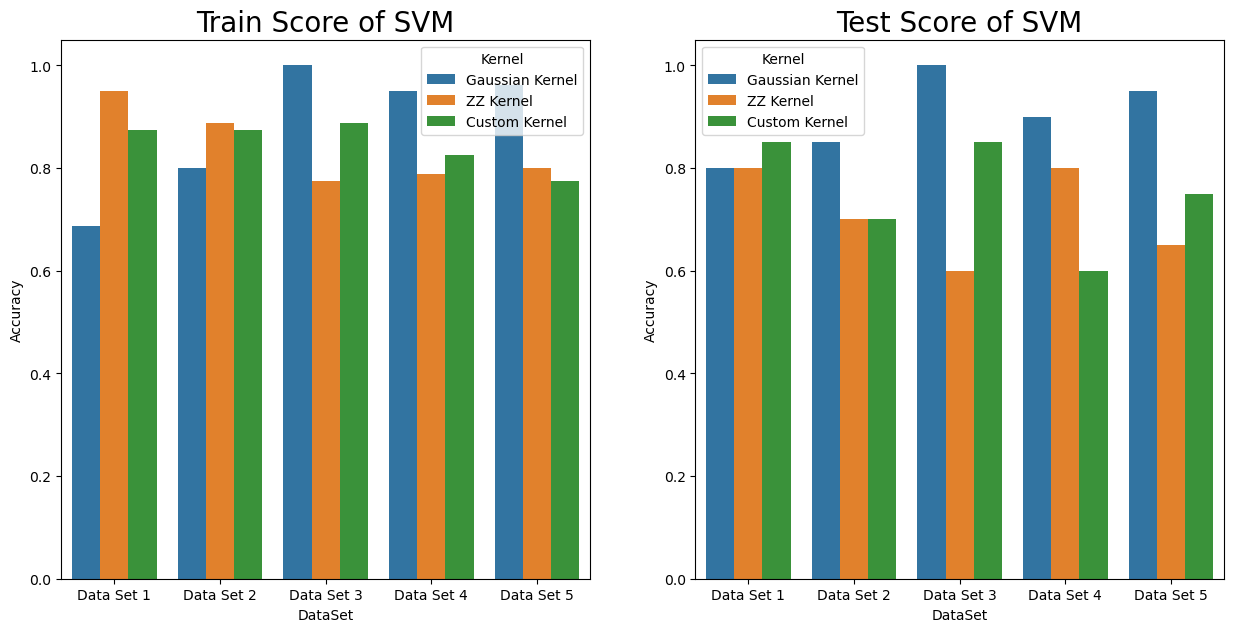

In [26]:
plot_train = pd.DataFrame(pd.concat([gaussian_kernel_result.iloc[0,:],zz_kernel_result.iloc[0,:],custom_kernel_result.iloc[0,:]]))
plot_train.columns = ["Accuracy"]
plot_train["DataSet"] = plot_train.index
plot_train["Kernel"] = ["Gaussian Kernel" for i in range(5)]+["ZZ Kernel" for i in range(5)]+["Custom Kernel" for i in range(5)]

plot_test = pd.DataFrame(pd.concat([gaussian_kernel_result.iloc[1,:],zz_kernel_result.iloc[1,:],custom_kernel_result.iloc[1,:]]))
plot_test.columns = ["Accuracy"]
plot_test["DataSet"] = plot_test.index
plot_test["Kernel"] = ["Gaussian Kernel" for i in range(5)]+["ZZ Kernel" for i in range(5)]+["Custom Kernel" for i in range(5)]

plt.figure(figsize = (15,7))
plt.subplot(121)
sns.barplot(data=plot_train, x="DataSet", y="Accuracy", hue="Kernel").axes.set_title(label="Train Score of SVM",fontsize=20)
plt.subplot(122)
sns.barplot(data=plot_test, x="DataSet", y="Accuracy", hue="Kernel").axes.set_title(label="Test Score of SVM",fontsize=20)
plt.show()